In [37]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
import pandas as pd
import math
import operator
import tensorflow as tf
import random
import time
import heapq

import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/architaggarwal/Downloads/ELL409/railwayBookingList.csv')
df = df.sample(frac=1).reset_index(drop=True)
print(df)
category = pd.get_dummies(df['preferredClass'])
category_sex = pd.get_dummies(df['sex'])
category_age = pd.get_dummies(df['age'])
df.drop(["preferredClass", 'sex', 'age'], axis = 1, inplace = True)
category.drop(['NO_PREF'], axis = 1, inplace = True)
# category_sex.drop(['NO_PREF'], axis = 1, inplace = True)
df = pd.concat([df, category, category_sex, category_age], axis=1)
df.columns = df.columns.astype(str)
print(df)
print(category)
print(category_sex)
print(category_age)

          caseID  boarded  budget  memberCount preferredClass     sex  age
0     2366637519        1     710            0       THIRD_AC    male    2
1      735421327        0    1278            1       FIRST_AC  female    3
2     1102137377        0     852            0       FIRST_AC  female    5
3      216352926        0    1633            0       FIRST_AC  female    3
4     3675461550        0    2556            5       FIRST_AC  female    2
5     2071717196        0    1065            2       FIRST_AC  female    4
6     2399368899        0     781            2       THIRD_AC    male    0
7     2305332837        1     710            0       THIRD_AC    male    4
8     1634891233        0     781            1       THIRD_AC    male    3
9     2911464899        1     852            0      SECOND_AC    male    2
10    3538824368        0     852            3       THIRD_AC  female    3
11    2168303068        1     852            2       THIRD_AC  female    0
12    2307003908        1

In [3]:
df.columns

Index([u'caseID', u'boarded', u'budget', u'memberCount', u'FIRST_AC',
       u'SECOND_AC', u'THIRD_AC', u'female', u'male', u'0', u'1', u'2', u'3',
       u'4', u'5', u'6', u'7', u'8'],
      dtype='object')

In [4]:
x = df.loc[:,"budget":"8"]
y = df.loc[:,"boarded"]
x = x.values
y = y.values
print(x.shape, y.shape)
count_class = np.bincount(y)
print(count_class)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
count_class = np.bincount(y_train)
print(count_class)

((1310, 16), (1310,))
[500 810]
[350 567]


In [5]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

('x_train shape:', (917, 16), 'y_train shape:', (917,))


In [6]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

('x_test shape:', (393, 16), 'y_test shape:', (393,))


In [7]:
df.describe()

caseID      boarded       budget  memberCount     FIRST_AC  \
count  1.310000e+03  1310.000000  1310.000000  1310.000000  1310.000000   
mean   2.208392e+09     0.618321   906.361069     0.883206     0.246565   
std    1.298203e+09     0.485984   372.252426     1.583222     0.431176   
min    1.558744e+06     0.000000   710.000000     0.000000     0.000000   
25%    1.054218e+09     0.000000   710.000000     0.000000     0.000000   
50%    2.276643e+09     1.000000   781.000000     0.000000     0.000000   
75%    3.401222e+09     1.000000   923.000000     1.000000     0.000000   
max    4.292796e+09     1.000000  4331.000000    10.000000     1.000000   

         SECOND_AC     THIRD_AC       female         male            0  \
count  1310.000000  1310.000000  1310.000000  1310.000000  1310.000000   
mean      0.211450     0.541221     0.355725     0.643511     0.264122   
std       0.408493     0.498488     0.478915     0.479145     0.441033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     0.000000     1.000000     0.000000   
75%       0.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 1            2            3            4            5  \
count  1310.000000  1310.000000  1310.000000  1310.000000  1310.000000   
mean      0.109160     0.262595     0.177099     0.103053     0.053435   
std       0.311959     0.440212     0.381898     0.304145     0.224985   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 6            7            8  
count  1310.000000  1310.000000  1310.000000  
mean      0.024427     0.005344     0.000763  
std       0.154431     0.072932     0.027629  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

In [8]:
x_train[:,0:2]

array([[710,   0],
       [710,   0],
       [710,   0],
       ..., 
       [923,   6],
       [852,   2],
       [710,   0]])

In [9]:
x_train_final = x_train[:,0:2]
print(x_train_final)
max_across_columns = np.max(x_train_final,axis=0)
print(max_across_columns)
x_train_final = x_train_final.astype('float32') / max_across_columns
print(x_train_final)

[[710   0]
 [710   0]
 [710   0]
 ..., 
 [923   6]
 [852   2]
 [710   0]]
[4331   10]
[[ 0.16393443  0.        ]
 [ 0.16393443  0.        ]
 [ 0.16393443  0.        ]
 ..., 
 [ 0.21311475  0.6       ]
 [ 0.19672131  0.2       ]
 [ 0.16393443  0.        ]]


In [10]:
x_train_final = np.column_stack((x_train_final, x_train[:,2:16]))
x_train_final

array([[ 0.16393443,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16393443,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16393443,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.21311475,  0.6       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.19672131,  0.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16393443,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [11]:
x_train = x_train_final

In [12]:
#PCA
A = x_train
M = mean(x_train.T, axis=1)
C = A - M
V = cov(C.T)
values, vectors = eig(V)
print(vectors)
print("------")
print(values)
print("------")
P = vectors.T.dot(C.T)
print(P.T)

[[ -5.03335184e-02   3.27589480e-02  -4.84180810e-02  -4.59442448e-02
   -1.67379528e-02   1.38021790e-02  -3.36089934e-02  -2.89803535e-02
    1.48846538e-01  -7.66248385e-03  -9.80760837e-01   6.66320650e-02
    2.78769927e-02  -1.32414074e-02   2.03529913e-15  -7.13363580e-15]
 [ -2.07351062e-02  -5.81193277e-02  -3.13910902e-02   4.10955788e-02
   -2.34255045e-02  -2.18220449e-02  -1.88718242e-02  -3.10705242e-02
    9.80823629e-01   8.45050826e-02   1.47825057e-01  -1.19140384e-02
   -9.52556786e-04  -4.50261584e-03  -1.24710589e-16   3.12783453e-15]
 [ -2.88248696e-01   2.94799361e-01  -4.45776935e-01  -4.61113816e-01
   -2.03647942e-01   7.37212270e-02  -1.42462310e-01  -9.72669531e-02
    1.18494626e-03  -4.15637250e-02   7.58441689e-02  -2.36028321e-03
   -2.30897081e-03   3.66752149e-01   4.69806272e-02  -3.98839402e-01]
 [ -1.42568109e-01   3.07979288e-01   3.47902319e-01   6.52439777e-01
   -1.44726825e-02  -3.07991886e-02   4.26854603e-02   1.30462073e-02
    5.33859732e-0

In [13]:
values_index = sorted(range(len(values)), key=lambda k: values[k], reverse = True)
print(values_index)
values_sorted = sorted(values, reverse = True)
print(values_sorted)

[0, 1, 2, 3, 4, 5, 6, 7, 9, 8, 11, 10, 12, 13, 14, 15]
[0.49535261118249829, 0.37315867467946973, 0.26632248655170582, 0.22166593909025448, 0.18338232270845353, 0.13726594062096129, 0.10535238500301045, 0.050765522565166879, 0.028657365293634704, 0.024129257380646151, 0.0049690490316341316, 0.0039971507972292493, 0.0012133854793898321, 0.00090361063539331989, 7.4085547927723267e-17, 4.5347115074684335e-18]


[ 0.49535261  0.86851129  1.13483377  1.35649971  1.53988203  1.67714797
  1.78250036  1.83326588  1.86192325  1.88605251  1.89102155  1.8950187
  1.89623209  1.8971357   1.8971357   1.8971357 ]


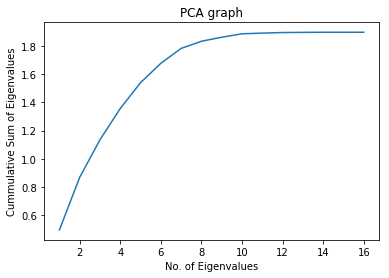

In [14]:
#plotting cummulative sum of eigenvalues vs no. of eigenvalues to see cutoff for no. of principal components
cumm_sum = np.zeros((16))
till_now = 0.0
for i in range(16):
    cumm_sum[i] = till_now + values_sorted[i]
    till_now = till_now + values_sorted[i]
no_of_eigenvalues = range(1,17)
print(cumm_sum)
plt.plot(no_of_eigenvalues, cumm_sum)
# plt.axis([0, 4, 1, 3.5])
plt.xlabel("No. of Eigenvalues")
plt.ylabel("Cummulative Sum of Eigenvalues")
plt.title("PCA graph")
plt.show()

In [15]:
x_train_final = P.T[:, 0:9]
x_train_final

array([[ 0.85436142, -0.41664452, -0.4145797 , ..., -0.00391294,
        -0.00663112, -0.12130922],
       [ 0.85436142, -0.41664452, -0.4145797 , ..., -0.00391294,
        -0.00663112, -0.12130922],
       [-0.5643483 , -0.79647655,  0.03818954, ...,  0.15659618,
         0.05211726, -0.11313029],
       ..., 
       [ 0.83944494, -0.44990502, -0.43579557, ..., -0.01688894,
        -0.0266987 ,  0.47450528],
       [ 0.84856412, -0.42719432, -0.4224454 , ..., -0.00878924,
        -0.0137954 ,  0.07973572],
       [-0.29443305, -1.21840645, -0.25919551, ...,  0.06300011,
         0.01706545, -0.18989206]])

In [16]:
x_train_final.shape

(917, 9)

In [17]:
#PCA for test data
C_test = x_test - M
P_test = vectors.T.dot(C_test.T)
print(P_test.T)

[[ -5.72075978e+01   3.80105721e+01  -5.48989141e+01 ...,  -1.50418449e+01
    2.31114024e-12  -8.09918436e-12]
 [ -4.68269596e+01   2.87802549e+01  -4.50667113e+01 ...,  -1.22327723e+01
    1.87798672e-12  -6.57215586e-12]
 [ -3.62277676e+01   2.22930415e+01  -3.41904679e+01 ...,  -9.39840251e+00
    1.44438912e-12  -5.06433421e-12]
 ..., 
 [ -3.48741853e+01   2.28368382e+01  -3.47834798e+01 ...,  -9.39551957e+00
    1.44480545e-12  -5.06516688e-12]
 [ -3.84686002e+01   2.51046042e+01  -3.82525547e+01 ...,  -1.03401621e+01
    1.58916220e-12  -5.56854200e-12]
 [ -3.48741853e+01   2.28368382e+01  -3.47834798e+01 ...,  -9.39551957e+00
    1.44480545e-12  -5.06516688e-12]]


In [18]:
x_test_final = P_test.T[:, 0:9]
x_test_final

array([[ -57.20759779,   38.0105721 ,  -54.89891413, ...,  -38.41736958,
         -33.12128649,  170.01328928],
       [ -46.82695958,   28.78025489,  -45.06671126, ...,  -31.0280784 ,
         -26.85133202,  141.09435599],
       [ -36.22776761,   22.29304154,  -34.19046795, ...,  -24.32292978,
         -20.63130478,  105.49097822],
       ..., 
       [ -34.87418525,   22.83683822,  -34.78347983, ...,  -23.86078856,
         -20.57793121,  105.53533171],
       [ -38.46860017,   25.1046042 ,  -38.25255467, ...,  -26.26589892,
         -22.66660683,  117.08425953],
       [ -34.87418525,   22.83683822,  -34.78347983, ...,  -23.86078856,
         -20.57793121,  105.53533171]])

In [19]:
x_test_final.shape

(393, 9)

In [20]:
#Mean of each attribute for each class
def mean_attribute_class(x_train, y_train, n_classes, n_features):
    mean_values = np.zeros((n_classes, n_features))
    store_frequency = [0]*n_classes
    for i in range(len(x_train)):
        mean_values[y_train[i]] = mean_values[[y_train[i]]] + x_train[i]
        store_frequency[y_train[i]] += 1
    for a in range(n_classes):
        mean_values[a] = mean_values[a].astype('float32') / store_frequency[a]
    return mean_values

In [21]:
mean_values = mean_attribute_class(x_train_final, y_train, 2, 9)
mean_values

array([[-0.50579876, -0.08350991, -0.06176651, -0.00457862, -0.05103043,
         0.03455374, -0.00923235, -0.012243  , -0.01170374],
       [ 0.31222147,  0.05154933,  0.03812747,  0.00282631,  0.03150026,
        -0.02132947,  0.00569898,  0.00755741,  0.00722453]])

In [22]:
#Standard Deviation(N-1) of rach attribute for each class
def standard_deviation(x_train, y_train, n_classes, n_features):
    std_values = np.zeros((n_classes, n_features))
    store_frequency = [0]*n_classes
    for i in range(x_train.shape[0]):
        std_values[y_train[i]] = std_values[y_train[i]] + (x_train[i] - mean_values[y_train[i]])*(x_train[i] - mean_values[y_train[i]])
        store_frequency[y_train[i]] += 1
    for a in range(n_classes):
        std_values[a] = std_values[a].astype('float32') / (store_frequency[a] - 1)
    std_values = np.sqrt(std_values)
    return std_values

In [23]:
std_values = standard_deviation(x_train_final, y_train, 2, 9)
std_values

array([[ 0.70585235,  0.58692097,  0.52086806,  0.52597161,  0.43743099,
         0.37045573,  0.32690868,  0.25041367,  0.11578067],
       [ 0.48846736,  0.62010424,  0.50981   ,  0.43374578,  0.41975185,
         0.3692316 ,  0.32329234,  0.20818765,  0.17506416]])

In [52]:
#Naive Bayes
def calculateprobability(x_test, y_test, n_classes, n_features):
    count = 0
    for i in range(x_test.shape[0]):
        store_prob = np.zeros((n_classes))
        for j in range(n_features):
            for k in range(n_classes):
                exponent = (-1*math.pow(x_test[i][j] - mean_values[k][j], 2)) / (2*math.pow(std_values[k][j], 2))
                final_term = -1*(math.log(math.sqrt(2*math.pi)*std_values[k][j])) + exponent
                store_prob[k] = store_prob[k] + final_term
        index, value = max(enumerate(store_prob), key=operator.itemgetter(1))
        print(store_prob)
        print("Prob = ", value, "Class = ", index, "Original = ", y_test[i])
        if index == y_test[i]:
            count = count + 1
        print(i)
    print(count, x_test.shape[0])

In [53]:
calculateprobability(x_test_final, y_test, 2, 9)

[-1111752.38065128  -515327.72927195]
('Prob = ', -515327.72927194892, 'Class = ', 1, 'Original = ', 1)
0
[-764418.76443274 -353311.5046985 ]
('Prob = ', -353311.50469849998, 'Class = ', 1, 'Original = ', 1)
1
[-428047.41396698 -198488.44380031]
('Prob = ', -198488.4438003097, 'Class = ', 1, 'Original = ', 0)
2
[-518511.13568006 -240354.67033268]
('Prob = ', -240354.670332685, 'Class = ', 1, 'Original = ', 0)
3
[-617304.40168981 -286096.54884007]
('Prob = ', -286096.54884007457, 'Class = ', 1, 'Original = ', 0)
4
[-1241053.55280663  -575583.40603031]
('Prob = ', -575583.40603031009, 'Class = ', 1, 'Original = ', 0)
5
[-535250.27548442 -247758.59063978]
('Prob = ', -247758.59063977544, 'Class = ', 1, 'Original = ', 1)
6
[-428349.95046093 -198460.97649448]
('Prob = ', -198460.97649448196, 'Class = ', 1, 'Original = ', 1)
7
[-429015.90246854 -198780.01248423]
('Prob = ', -198780.01248422623, 'Class = ', 1, 'Original = ', 0)
8
[-2129722.59987987  -986245.01238217]
('Prob = ', -986245.01238

In [28]:
#K Means Clustering
def calculatecentroids(x_train, y_train, k, tolerance=0.0001, max_iterations=1000):
#     k = 10
#     tolerance = 0.0001
#     max_iterations = 1000
    centroids = {}
    for i in range(k):
        print("hallelujah")
        choose = random.randint(0, x_train.shape[0] - k) + i
        centroids[i] = x_train[choose]
    print('Centroids = ', centroids)
    for i in range(max_iterations):
        print("i = ", i)
        classes = {}
        for j in range(k):
            classes[j] = []
        for each in x_train:
            distances = [np.linalg.norm(each - centroids[centroid]) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(each)
        
        previous = dict(centroids)
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis = 0)
        
        isOptimal = True
        for centroid in centroids:
            original_centroid = previous[centroid]
            curr = centroids[centroid]
            print("Factor = ", np.sum((curr - original_centroid)/original_centroid * 100.0))
            if abs(np.sum((curr - original_centroid)/original_centroid * 100.0)) > tolerance:
                isOptimal = False
        if isOptimal:
            break
    return centroids
#     count = 0
#     for i in range(60000):
#         distances = [np.linalg.norm(x_train_final[i] - centroids[centroid]) for centroid in centroids]
#         classification = distances.index(min(distances))
#         if classification == y_train[i]:
#             count = count + 1
#         print(i)
#     print(count)

In [29]:
centroids = calculatecentroids(x_train, y_train, 2, 0.0001, 1000)
centroids

hallelujah
hallelujah
('Centroids = ', {0: array([ 0.19672131,  0.5       ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ]), 1: array([ 0.16393443,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])})
('i = ', 0)
('Factor = ', nan)
('Factor = ', inf)
('i = ', 1)
('Factor = ', nan)
('Factor = ', -11.600053142227726)
('i = ', 2)
('Factor = ', nan)
('Factor = ', nan)


/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in divide
/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in divide
/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in divide
/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in divide


{0: array([ 0.2326407 ,  0.12802548,  0.32165605,  0.23566879,  0.44267516,
         1.        ,  0.        ,  0.22929936,  0.1433121 ,  0.2388535 ,
         0.19426752,  0.11464968,  0.05414013,  0.02229299,  0.00318471,  0.        ]),
 1: array([ 0.19712911,  0.06915423,  0.2039801 ,  0.21393035,  0.58043118,
         0.        ,  0.99834163,  0.28192371,  0.09618574,  0.26699834,
         0.16583748,  0.10945274,  0.04477612,  0.02819237,  0.00497512,
         0.00165837])}

In [60]:
#K Nearest Neighbour
def euclidean_distance(instance1, instance2):
    sum = 0
    for i in range(len(instance1)):
        sum += (instance1[i] - instance2[i])**2
    sum = math.sqrt(sum)
    return sum

def predict_accuracy(x_train, y_train, x_test, y_test, k, n_classes, n_features):
#     k = 10
    count = 0
    for i in range(x_test.shape[0]):
        start = time.time()
#         store_distances = np.zeros((x_train_final.shape[0], 2))
        x_train_final_copy = x_train - x_test[i]
        store_distances = np.sqrt(np.sum(np.square(x_train_final_copy), axis=1))
#         store_distances = [[np.linalg.norm(x_test_final[i] - each), each1] for each, each1 in zip(x_train_final, y_train)]
#         for j in range(x_train_final.shape[0]):
# #             distance = euclidean_distance(x_test_final[i], x_train_final[j])
#             distance = np.linalg.norm(x_test_final[i] - x_train_final[j])
#             store_distances[j] = [distance, y_train[j]]
#         store_distances = np.array(store_distances)
#         print(store_distances.shape)
#         print(store_distances)
        print(store_distances)
        print(store_distances[heapq.nsmallest(k, range(len(store_distances)), store_distances.take)])
        store_labels = y_train[heapq.nsmallest(k, range(len(store_distances)), store_distances.take)]
        print(store_labels)
        final_class = stats.mode(store_labels).mode[0]
#         store_frequency = [0]*10
#         print(store_distances)
#         for j in range(len(store_distances)):
#             store_frequency[int(store_distances[j][1])] += 1
            
#         final_class = store_frequency.index(max(store_frequency))
        
        if y_test[i] == final_class:
            count = count + 1
        print(final_class, y_test[i])
        print(count, i)
        end = time.time()
        print(end - start)
    return(count)
    print(count)

In [61]:
count = predict_accuracy(x_train_final, y_train, x_test_final, y_test, 11, 2, 9)
count

[ 206.84896045  206.84896045  206.6865879   206.62939628  206.62939628
  205.87131658  206.55924015  206.59686709  206.77232315  206.77232315
  206.55650263  205.92661596  206.02349613  206.80062384  206.73495324
  206.6865879   206.87740894  205.9187904   206.73495324  206.59271053
  206.84896045  206.84896045  205.89169261  206.77232315  206.56727353
  205.98771172  205.97495779  206.73495324  206.76515972  206.73495324
  205.96209972  206.87740894  206.08065464  205.62098063  206.6216067
  206.56687899  206.4713574   205.8340098   206.84896045  206.77232315
  205.93764191  206.66998292  206.51886793  206.58974812  206.64038645
  206.84896045  205.92365353  206.71618475  206.72396715  206.59985014
  206.08488138  206.77232315  206.02621413  206.58903789  206.77232315
  206.76515972  206.64038645  206.84896045  206.77232315  206.54135034
  206.37777619  206.78290676  206.76639818  206.87740894  206.78290676
  206.73495324  206.71618475  206.4389978   206.72902842  206.73495324
  205.5

[0 1 0 0 0 1 0 1 0 1 0]
(0, 0)
(4, 5)
0.0330600738525
[ 142.88271024  142.88271024  142.709317    142.66417278  142.66417278
  141.90780523  142.58554753  142.64270288  142.8112711   142.8112711
  142.59768802  141.96783218  142.05245541  142.82280941  142.76926845
  142.709317    142.91102698  141.94810017  142.76926845  142.63285379
  142.88271024  142.88271024  141.92706233  142.8112711   142.60053788
  142.03484795  141.9921927   142.76926845  142.798402    142.76926845
  142.00931397  142.91102698  142.12840596  141.66027231  142.64455066
  142.59530091  142.49148656  141.87117952  142.88271024  142.8112711
  141.98585753  142.70452304  142.54051404  142.62989178  142.68211264
  142.88271024  141.96487017  142.73173326  142.75133816  142.6259339
  142.12157393  142.8112711   142.06226461  142.61916427  142.8112711
  142.798402    142.68211264  142.88271024  142.8112711   142.56988401
  142.41092997  142.82395691  142.80534681  142.91102698  142.82395691
  142.76926845  142.7317332

(0, 1)
(8, 12)
0.0334351062775
[ 128.33794481  128.33794481  128.16943343  128.12448618  128.12448618
  127.36015036  128.04697477  128.10487988  128.2733922   128.2733922
  128.05932846  127.42074418  127.51174939  128.27657348  128.23085938
  128.16943343  128.37439499  127.40792502  128.23085938  128.08853486
  128.33794481  128.33794481  127.38156446  128.2733922   128.06291024
  127.49095915  127.44996727  128.23085938  128.25402899  128.23085938
  127.4572136   128.37439499  127.58416396  127.11421286  128.11175254
  128.05765718  127.94681899  127.32318041  128.33794481  128.2733922
  127.43972881  128.17319915  128.0014021   128.08557271  128.14336932
  128.33794481  127.41778197  128.19926848  128.2119876   128.09573264
  127.5737688   128.2733922   127.51650722  128.07894127  128.2733922
  128.25402899  128.14336932  128.33794481  128.2733922   128.02407959
  127.87239802  128.28700195  128.2674679   128.37439499  128.28700195
  128.23085938  128.19926848  127.92749931  128.2

[ 139.99431749  140.02122772  140.05566354  140.07149431  140.07560028
  140.11842227  140.15556916  140.17844967  140.18948842  140.19349501
  140.21910952]
[0 1 0 0 0 1 0 0 1 1 0]
(0, 1)
(10, 17)
0.0437469482422
[ 154.63279967  154.63279967  154.47145149  154.41894427  154.41894427
  153.65177893  154.34949373  154.38517595  154.56074223  154.56074223
  154.3398082   153.71214563  153.80968906  154.58590319  154.51838547
  154.47145149  154.6613319   153.69943785  154.51838547  154.37666032
  154.63279967  154.63279967  153.66647441  154.56074223  154.35110114
  153.76760889  153.7625308   154.51838547  154.54920981  154.51838547
  153.7418691   154.6613319   153.8604285   153.40684384  154.40630719
  154.352349    154.25748859  153.61438428  154.63279967  154.56074223
  153.71672941  154.45325517  154.30411495  154.37369805  154.42350936
  154.63279967  153.70918337  154.50119744  154.51382192  154.38383287
  153.86393768  154.56074223  153.80737346  154.37358605  154.56074223
  154

[0 1 0 0 0 1 0 1 0 1 0]
(0, 0)
(12, 22)
0.0413601398468
[ 141.28587642  141.28587642  141.12459434  141.05771757  141.05771757
  140.30847508  140.99515124  141.02323543  141.20650501  141.20650501
  140.9848097   140.36188032  140.46021662  141.23942331  141.17108828
  141.12459434  141.31451244  140.35621206  141.17108828  141.02178514
  141.28587642  141.28587642  140.32981871  141.20650501  141.003268
  140.42413798  140.41347859  141.17108828  141.20202414  141.17108828
  140.39827814  141.31451244  140.51725134  140.05566354  141.05209099
  140.99801861  140.90995962  140.27139345  141.28587642  141.20650501
  140.37300396  141.09860247  140.95671727  141.01882278  141.06878886
  141.28587642  140.35891807  141.15440642  141.16002363  141.0360683
  140.52200773  141.20650501  140.46462144  141.01930081  141.20650501
  141.20202414  141.06878886  141.28587642  141.20650501  140.97228093
  140.80582556  141.21231613  141.2005803   141.31451244  141.21231613
  141.17108828  141.1544

(0, 1)
(13, 28)
0.0337419509888
[ 194.11915244  194.11915244  193.94180589  193.89465485  193.89465485
  193.12680397  193.82451098  193.87211955  194.04742818  194.04742818
  193.82179729  193.1921071   193.2942886   194.06088476  194.00011155
  193.94180589  194.14757141  193.1794301   194.00011155  193.8631037
  194.11915244  194.11915244  193.15228498  194.04742818  193.83253306
  193.25829385  193.23576365  194.00011155  194.03540701  194.00011155
  193.23270319  194.14757141  193.35119764  192.88657259  193.88203377
  193.82729851  193.7318236   193.08946516  194.11915244  194.04742818
  193.20312368  193.94035278  193.77417593  193.86014137  193.90563334
  194.11915244  193.18914468  193.97652631  193.98913739  193.87023564
  193.34536594  194.04742818  193.28677475  193.84433813  194.04742818
  194.03540701  193.90563334  194.11915244  194.04742818  193.80179528
  193.64318026  194.05316443  194.04150351  194.14757141  194.05316443
  194.00011155  193.97652631  193.70947664  19

(16, 36)
0.0333759784698
[ 155.62140397  155.62140397  155.45474843  155.40895261  155.40895261
  154.65175093  155.3310215   155.38697846  155.55627567  155.55627567
  155.34190102  154.71182453  154.79086449  155.56198948  155.51420666
  155.45474843  155.65619367  154.69912159  155.51420666  155.37078663
  155.62140397  155.62140397  154.67116748  155.55627567  155.34545143
  154.77844978  154.73112041  155.51420666  155.53707536  155.51420666
  154.74642081  155.65619367  154.87199589  154.40431936  155.3963191
  155.34021006  155.23058749  154.61509801  155.62140397  155.55627567
  154.72928143  155.45579391  155.28592728  155.36782444  155.42633349
  155.62140397  154.70886245  155.48421278  155.49683434  155.37789902
  154.86600709  155.55627567  154.80637103  155.36388115  155.55627567
  155.53707536  155.42633349  155.62140397  155.55627567  155.30831226
  155.15568457  155.56839999  155.55035131  155.65619367  155.56839999
  155.51420666  155.48421278  155.20884678  155.50828

  232.31094354  232.42106354]
[ 231.16508094  231.21022806  231.23351013  231.24320774  231.24619583
  231.30108403  231.32636161  231.35611599  231.35991114  231.3752771
  231.38953559]
[0 1 0 0 0 1 0 0 1 1 0]
(0, 0)
(19, 47)
0.0381729602814
[ 465.84435781  465.84435781  465.67520231  465.62290595  465.62290595
  464.86408147  465.55207548  465.59701481  465.77263394  465.77263394
  465.55188024  464.92408999  465.01545706  465.78909665  465.73047791
  465.67520231  465.87064095  464.91143831  465.73047791  465.58761362
  465.84435781  465.84435781  464.88384527  465.77263394  465.5622324
  464.98452437  464.96009383  465.73047791  465.76025252  465.73047791
  464.96115224  465.87064095  465.07763019  464.61804628  465.61027742
  465.55269743  465.45859989  464.82688175  465.84435781  465.77263394
  464.93722548  465.6655588   465.50693638  465.58465115  465.63602249
  465.84435781  464.92112753  465.70473924  465.71736361  465.59473907
  465.07925507  465.77263394  465.01635344  465.

  127.32560615]
[0 1 0 0 0 1 0 1 0 1 0]
(0, 1)
(25, 63)
0.0364768505096
[ 167.79734106  167.79734106  167.62985459  167.57740241  167.57740241
  166.8175238   167.51289294  167.54358448  167.72542573  167.72542573
  167.49232781  166.88378426  166.96965398  167.75004768  167.67718443
  167.62985459  167.82583866  166.87105203  167.67718443  167.53447327
  167.79734106  167.79734106  166.84390017  167.72542573  167.50900497
  166.93898025  166.9221162   167.67718443  167.71330294  167.67718443
  166.91328974  167.82583866  167.03221915  166.57723705  167.56473443
  167.50973055  167.41983455  166.78054271  167.79734106  167.72542573
  166.88285073  167.61207731  167.46162638  167.53151087  167.57647486
  167.79734106  166.88082212  167.66545433  167.67811025  167.54759299
  167.03753239  167.72542573  166.9787861   167.52615573  167.72542573
  167.71330294  167.57647486  167.79734106  167.72542573  167.48414181
  167.32501709  167.72521769  167.71950114  167.82583866  167.72521769
  167

(0, 1)
(30, 80)
0.034619808197
[ 128.27657348  128.27657348  128.12358659  128.07862625  128.07862625
  127.31402189  128.00108223  128.04339445  128.2119876   128.2119876
  127.99782142  127.37463116  127.44996727  128.2307683   128.16943343
  128.12358659  128.31304053  127.36181138  128.16943343  128.02704192
  128.27657348  128.27657348  127.33546512  128.2119876   128.0014021
  127.42918458  127.40385194  128.16943343  128.19261669  128.16943343
  127.395422    128.31304053  127.52243161  127.06800869  128.06589205
  128.01177351  127.90089005  127.27709049  128.27657348  128.2119876
  127.37792366  128.11175254  127.95549347  128.02407959  128.08190342
  128.27657348  127.37166912  128.1534373   128.16615697  128.03424402
  127.52760546  128.2119876   127.47043314  128.03306529  128.2119876
  128.19261669  128.08190342  128.27657348  128.2119876   127.97818323
  127.82644526  128.22560769  128.20606295  128.31304053  128.22560769
  128.16943343  128.1534373   127.86592329  128.16

(0, 0)
(33, 90)
0.0382850170135
[ 207.76974735  207.76974735  207.60815205  207.55118458  207.55118458
  206.80028563  207.48428027  207.51783458  207.69828915  207.69828915
  207.47282657  206.86023902  206.93842201  207.72164735  207.65628041
  207.60815205  207.79326372  206.84757565  207.65628041  207.50790984
  207.76974735  207.76974735  206.81938627  207.69828915  207.4874331
  206.91035475  206.89012075  207.65628041  207.68536298  207.65628041
  206.88969718  207.79326372  207.00388085  206.55286876  207.5385727
  207.47737522  207.39004308  206.76357077  207.76974735  207.69828915
  206.86636896  207.58671287  207.43926458  207.50494749  207.55729583
  207.76974735  206.85727691  207.63756886  207.65017113  207.51982955
  207.01497304  207.69828915  206.94967955  207.50618352  207.69828915
  207.68536298  207.55729583  207.76974735  207.69828915  207.45678559
  207.29781248  207.69434389  207.69236461  207.79326372  207.69434389
  207.65628041  207.63756886  207.3568608   207

0.0410771369934
[ 155.62140397  155.62140397  155.45474843  155.40895261  155.40895261
  154.65175093  155.3310215   155.38697846  155.55627567  155.55627567
  155.34190102  154.71182453  154.79086449  155.56198948  155.51420666
  155.45474843  155.65619367  154.69912159  155.51420666  155.37078663
  155.62140397  155.62140397  154.67116748  155.55627567  155.34545143
  154.77844978  154.73112041  155.51420666  155.53707536  155.51420666
  154.74642081  155.65619367  154.87199589  154.40431936  155.3963191
  155.34021006  155.23058749  154.61509801  155.62140397  155.55627567
  154.72928143  155.45579391  155.28592728  155.36782444  155.42633349
  155.62140397  154.70886245  155.48421278  155.49683434  155.37789902
  154.86600709  155.55627567  154.80637103  155.36388115  155.55627567
  155.53707536  155.42633349  155.62140397  155.55627567  155.30831226
  155.15568457  155.56839999  155.55035131  155.65619367  155.56839999
  155.51420666  155.48421278  155.20884678  155.50828231  155.

(42, 116)
0.0323710441589
[ 193.93035255  193.93035255  193.76829556  193.71595287  193.71595287
  192.95259986  193.64572399  193.68307285  193.85854968  193.85854968
  193.63786548  193.0127671   193.10463129  193.88233522  193.81634337
  193.76829556  193.95879535  193.00009733  193.81634337  193.67405019
  193.93035255  193.93035255  192.96780766  193.85854968  193.64859796
  193.06867486  193.05640002  193.81634337  193.84652161  193.81634337
  193.04306008  193.95879535  193.16166529  192.7069876   193.70333908
  193.64853141  193.55294904  192.9153479   193.93035255  193.85854968
  193.01861873  193.75139837  193.60050747  193.67108781  193.72178509
  193.93035255  193.00980477  193.79790921  193.81051298  193.68119255
  193.16566018  193.85854968  193.10753329  193.67075286  193.85854968
  193.84652161  193.72178509  193.93035255  193.85854968  193.62300564
  193.46423414  193.86430598  193.85262489  193.95879535  193.86430598
  193.81634337  193.79790921  193.52024881  193.810

[ 141.95720572  141.95720572  141.78263316  141.73720999  141.73720999
  140.97662532  141.65945442  141.716301    141.88528011  141.88528011
  141.67100049  141.03694281  141.12850053  141.89689784  141.84299266
  141.78263316  141.97866667  141.024182    141.84299266  141.70709302
  141.95720572  141.95720572  140.99694955  141.88528011  141.67456786
  141.09811894  141.06782665  141.84299266  141.87305098  141.84299266
  141.07948161  141.97866667  141.19153264  140.72982616  141.72452588
  141.66226089  141.56618932  140.93984563  141.95720572  141.88528011
  141.05509293  141.7849038   141.61413514  141.70413097  141.75527295
  141.95720572  141.03398066  141.8122685   141.8249395   141.70718835
  141.19070905  141.88528011  141.12497453  141.69191574  141.88528011
  141.87305098  141.75527295  141.95720572  141.88528011  141.6437146
  141.48442424  141.89103005  141.87935574  141.97866667  141.89103005
  141.84299266  141.8122685   141.54553873  141.8370683   141.84299266
  140.6

0.0408868789673
[ 128.35670653  128.35670653  128.19602136  128.1432798   128.1432798
  127.38690676  128.06577999  128.10806581  128.27657348  128.27657348
  128.07032375  127.43964366  127.53063384  128.31093233  128.24183993
  128.19602136  128.38536262  127.43467415  128.24183993  128.10733396
  128.35670653  128.35670653  127.40831237  128.27657348  128.07390507
  127.50200358  127.48455007  128.24183993  128.27280293  128.24183993
  127.47610619  128.38536262  127.59520169  127.13314986  128.13835267
  128.08426764  127.981267    127.34992673  128.35670653  128.27657348
  127.45077969  128.18418486  128.02802482  128.10437181  128.15435746
  128.35670653  127.43668145  128.22585037  128.2307683   128.10672524
  127.60047601  128.27657348  127.54323191  128.10554764  128.27657348
  128.27280293  128.15435746  128.35670653  128.27657348  128.0585066
  127.89122851  128.29797714  128.27064847  128.38536262  128.29797714
  128.24183993  128.22585037  127.94632225  128.23591528  128.2

0.0390529632568
[ 141.18492967  141.18492967  141.02352737  140.9636983   140.9636983
  140.20682581  140.90108771  140.92919265  141.11258616  141.11258616
  140.88364441  140.26738748  140.3586673   141.1384417   141.07005625
  141.02352737  141.20650501  140.25458628  141.07005625  140.92064526
  141.18492967  141.18492967  140.22820927  141.11258616  140.9021156
  140.31544476  140.3118938   141.07005625  141.10101737  141.07005625
  140.29669017  141.20650501  140.40862383  139.96100239  140.95097407
  140.88976723  140.8087374   140.16980486  141.18492967  141.11258616
  140.27139029  140.99752054  140.8555298   140.9176829   140.96768386
  141.18492967  140.26442537  141.0533625   141.0660722   140.93493901
  140.42048676  141.11258616  140.35595582  140.91816079  141.11258616
  141.10101737  140.96768386  141.18492967  141.11258616  140.871106
  140.71163792  141.10423083  141.10666174  141.20650501  141.10423083
  141.07005625  141.0533625   140.77447898  141.06413183  141.070

  128.99919309  129.12199694]
[ 127.86666207  127.90759467  127.94332402  127.94828324  127.95200498
  127.99797914  128.03662155  128.06251137  128.06643689  128.07358358
  128.09213243]
[0 1 0 0 0 1 0 1 0 1 0]
(0, 0)
(54, 147)
0.0329329967499
[ 155.77960636  155.77960636  155.61312268  155.56094639  155.56094639
  154.80448795  155.49595264  155.5261363   155.70812325  155.70812325
  155.47466555  154.87097599  154.94991568  155.73309545  155.65967219
  155.61312268  155.8079409   154.85829068  155.65967219  155.51638995
  155.77960636  155.77960636  154.83032124  155.70812325  155.49107266
  154.92461073  154.903145    155.65967219  155.69536234  155.65967219
  154.89907268  155.8079409   155.01807853  154.56373119  155.54832979
  155.49226589  155.40205986  154.76775178  155.77960636  155.70812325
  154.8690458   155.59489293  155.44447135  155.5134276   155.55902705
  155.77960636  154.86801402  155.64898539  155.66158903  155.52992607
  155.0248807   155.70812325  154.96541653  1

(54, 152)
0.0733201503754
[ 154.21778085  154.21778085  154.03653768  153.98386311  153.98386311
  153.22101693  153.92074224  153.96298195  154.14553538  154.14553538
  153.91100036  153.28802846  153.39249922  154.15779373  154.09657478
  154.03653768  154.24640193  153.27524611  154.09657478  153.95443768
  154.21778085  154.21778085  153.24881698  154.14553538  153.9288497
  153.35671788  153.33217846  154.09657478  154.13397474  154.09657478
  153.33088878  154.24640193  153.44975267  152.98205436  153.97115109
  153.9171034   153.8284842   153.18384361  154.21778085  154.14553538
  153.29913901  154.03120787  153.86874583  153.95147543  153.99492576
  154.21778085  153.28506618  154.07281938  154.08551816  153.96811924
  153.44129452  154.14553538  153.38354209  153.93188818  154.14553538
  154.13397474  153.99492576  154.21778085  154.14553538  153.89138383
  153.73212875  154.14485099  154.13961111  154.24640193  154.14485099
  154.09657478  154.07281938  153.807843    154.0906

[ 141.97866667  141.97866667  141.81117129  141.76575863  141.76575863
  141.00532986  141.68801664  141.74485432  141.91379809  141.91379809
  141.69956236  141.06563867  141.15008341  141.91836739  141.87151916
  141.81117129  142.01420712  141.05288318  141.87151916  141.72859314
  141.97866667  141.97866667  141.02564863  141.91379809  141.70312697
  141.13388557  141.08941829  141.87151916  141.89452402  141.87151916
  141.10108111  142.01420712  141.22727805  140.75857181  141.75307979
  141.69788028  141.58770764  140.9685336   141.97866667  141.91379809
  141.08378564  141.81344607  141.64270592  141.72563095  141.78381849
  141.97866667  141.06267652  141.84080335  141.85346909  141.73574418
  141.21929891  141.91379809  141.16073508  141.72047293  141.91379809
  141.89452402  141.78381849  141.97866667  141.91379809  141.66522323
  141.51302194  141.92659383  141.90787371  142.01420712  141.92659383
  141.87151916  141.84080335  141.56706066  141.8655948   141.87151916
  140.

[ 130.05373998  130.05373998  129.87986353  129.83546644  129.83546644
  129.07960119  129.75596484  129.81458447  129.98239302  129.98239302
  129.76961713  129.13959996  129.22325604  129.99321717  129.94044244
  129.87986353  130.08202082  129.11917053  129.94044244  129.80461632
  130.05373998  130.05373998  129.09868552  129.98239302  129.77163585
  129.20713482  129.1623313   129.94044244  129.96939933  129.94044244
  129.18161936  130.08202082  129.30076033  128.83181399  129.81516143
  129.76640034  129.66176121  129.04306247  130.05373998  129.98239302
  129.15831619  129.87576362  129.71097654  129.80165442  129.85408511
  130.05373998  129.13663806  129.90154888  129.92183464  129.79630194
  129.29312527  129.98239302  129.23396278  129.79050587  129.98239302
  129.96939933  129.85408511  130.05373998  129.98239302  129.74101322
  129.58209512  129.99575668  129.97646889  130.08202082  129.99575668
  129.94044244  129.90154888  129.64116098  129.93451833  129.94044244
  128.

(61, 170)
0.0472049713135
[ 128.41803719  128.41803719  128.24183993  128.18911422  128.18911422
  127.43300646  128.11164699  128.16951784  128.33794481  128.33794481
  128.13179362  127.48573078  127.59237452  128.35670653  128.30322884
  128.24183993  128.44668017  127.48075904  128.30322884  128.168786
  128.41803719  128.41803719  127.45438298  128.33794481  128.13537603
  127.5637405   127.53063384  128.30322884  128.33417448  128.30322884
  127.53785632  128.44668017  127.65689647  127.17932797  128.18418486
  128.13012297  128.02716473  127.39598792  128.41803719  128.33794481
  127.51254714  128.24559439  128.07390507  128.16582403  128.21578624
  128.41803719  127.48276839  128.27165331  128.27657348  128.16817672
  127.64661061  128.33794481  127.58927732  128.15139531  128.33794481
  128.33417448  128.21578624  128.41803719  128.33794481  128.10437181
  127.93715562  128.35933443  128.33202015  128.44668017  128.35933443
  128.30322884  128.27165331  128.00785722  128.29730

(62, 175)
0.0362491607666
[ 142.87011603  142.87011603  142.6967152   142.64455066  142.64455066
  141.89511494  142.56592411  142.62307622  142.79167083  142.79167083
  142.58506979  141.94810017  142.03980931  142.81021351  142.75666835
  142.6967152   142.89843797  141.94244583  142.75666835  142.6202363
  142.87011603  142.87011603  141.91435618  142.79167083  142.58792741
  142.02216546  141.97954484  142.75666835  142.78580263  142.75666835
  141.99662622  142.89843797  142.11572875  141.64050909  142.63893749
  142.58268691  142.47886992  141.85849455  142.87011603  142.79167083
  141.97316901  142.69890864  142.52790185  142.61727429  142.66949961
  142.87011603  141.94513802  142.72612876  142.73173326  142.62032592
  142.10918132  142.79167083  142.04958563  142.60654953  142.79167083
  142.78580263  142.66949961  142.87011603  142.79167083  142.5572648
  142.39127976  142.81135498  142.78574627  142.89843797  142.81135498
  142.75666835  142.72612876  142.45765236  142.75074

[ 128.41803719  128.41803719  128.24183993  128.18911422  128.18911422
  127.43300646  128.11164699  128.16951784  128.33794481  128.33794481
  128.13179362  127.48573078  127.59237452  128.35670653  128.30322884
  128.24183993  128.44668017  127.48075904  128.30322884  128.168786
  128.41803719  128.41803719  127.45438298  128.33794481  128.13537603
  127.5637405   127.53063384  128.30322884  128.33417448  128.30322884
  127.53785632  128.44668017  127.65689647  127.17932797  128.18418486
  128.13012297  128.02716473  127.39598792  128.41803719  128.33794481
  127.51254714  128.24559439  128.07390507  128.16582403  128.21578624
  128.41803719  127.48276839  128.27165331  128.27657348  128.16817672
  127.64661061  128.33794481  127.58927732  128.15139531  128.33794481
  128.33417448  128.21578624  128.41803719  128.33794481  128.10437181
  127.93715562  128.35933443  128.33202015  128.44668017  128.35933443
  128.30322884  128.27165331  128.00785722  128.29730455  128.30322884
  127.15

[ 127.05176916  127.09300721  127.12818133  127.13314986  127.13698845
  127.1832777   127.22101545  127.24713931  127.25105588  127.2582914
  127.27676159]
[0 1 0 0 0 1 0 1 0 1 0]
(0, 1)
(68, 186)
0.0514500141144
[ 154.96768927  154.96768927  154.80028616  154.74785493  154.74785493
  153.9881007   154.68378067  154.71350623  154.89581154  154.89581154
  154.66177107  154.05485714  154.14002017  154.92091781  154.84709684
  154.80028616  154.99617182  154.04212318  154.84709684  154.7043562
  154.96768927  154.96768927  154.01492545  154.89581154  154.67889794
  154.10950469  154.09298676  154.84709684  154.88364596  154.84709684
  154.08381639  154.99617182  154.20277472  153.74820357  154.73519051
  154.68011927  154.59068612  153.95116263  154.96768927  154.89581154
  154.05292411  154.78201508  154.63203503  154.70139381  154.74593285
  154.96768927  154.05189505  154.83636508  154.8490164   154.71796775
  154.20842502  154.89581154  154.14984843  154.69613087  154.89581154
  154.

(69, 192)
0.0529968738556
[ 128.27657348  128.27657348  128.12358659  128.07862625  128.07862625
  127.31402189  128.00108223  128.04339445  128.2119876   128.2119876
  127.99782142  127.37463116  127.44996727  128.2307683   128.16943343
  128.12358659  128.31304053  127.36181138  128.16943343  128.02704192
  128.27657348  128.27657348  127.33546512  128.2119876   128.0014021
  127.42918458  127.40385194  128.16943343  128.19261669  128.16943343
  127.395422    128.31304053  127.52243161  127.06800869  128.06589205
  128.01177351  127.90089005  127.27709049  128.27657348  128.2119876
  127.37792366  128.11175254  127.95549347  128.02407959  128.08190342
  128.27657348  127.37166912  128.1534373   128.16615697  128.03424402
  127.52760546  128.2119876   127.47043314  128.03306529  128.2119876
  128.19261669  128.08190342  128.27657348  128.2119876   127.97818323
  127.82644526  128.22560769  128.20606295  128.31304053  128.22560769
  128.16943343  128.1534373   127.86592329  128.1635087

[ 142.05758256  142.05758256  141.88313824  141.83069533  141.83069533
  141.07769864  141.75299354  141.80980063  141.97866667  141.97866667
  141.77158275  141.13089913  141.22947504  141.99731892  141.94345337
  141.88313824  142.086066    141.1252323   141.94345337  141.80765081
  142.05758256  142.05758256  141.09798411  141.97866667  141.77514795
  141.20618843  141.16884619  141.94345337  141.97348733  141.94345337
  141.18048504  142.086066    141.29953701  140.82394918  141.82507011
  141.76990124  141.66684914  141.04085828  142.05758256  141.97866667
  141.15612116  141.88540361  141.71475975  141.80468875  141.85579544
  142.05758256  141.12793683  141.91275091  141.91836739  141.80774574
  141.29165534  141.97866667  141.2330272   141.79248266  141.97866667
  141.97348733  141.85579544  142.05758256  141.97866667  141.74431687
  141.57807656  141.99849532  141.97274199  142.086066    141.99849532
  141.94345337  141.91275091  141.64621374  141.93752899  141.94345337
  140.

(0, 0)
(71, 206)
0.0338687896729
[ 157.25285354  157.25285354  157.08801996  157.04266274  157.04266274
  156.29199988  156.96305713  157.01964747  157.18844048  157.18844048
  156.97502699  156.35160868  156.41837913  157.19408881  157.14682708
  157.08801996  157.28728319  156.3390024   157.14682708  157.00234797
  157.25285354  157.25285354  156.30952874  157.18844048  156.97729197
  156.41609942  156.35929023  157.14682708  157.16813432  157.14682708
  156.38443573  157.28728319  156.51002999  156.04295603  157.03012426
  156.97206205  156.86112243  156.25574568  157.25285354  157.18844048
  156.36886797  157.08894735  156.91842002  156.99938599  157.05984836
  157.25285354  156.34864697  157.11712295  157.12964974  157.00937779
  156.50644468  157.18844048  156.44506419  156.99804842  157.18844048
  157.16813432  157.05984836  157.25285354  157.18844048  156.9405257
  156.78822665  157.20038147  157.18251657  157.28728319  157.20038147
  157.14682708  157.11712295  156.83833653  1

(0, 1)
(72, 211)
0.0364081859589
[ 141.99731892  141.99731892  141.83689677  141.78443946  141.78443946
  141.03120193  141.70670793  141.74942949  141.91836739  141.91836739
  141.71119557  141.08441409  141.16884619  141.95111767  141.88313824
  141.83689677  142.02581394  141.07874902  141.88313824  141.74727906
  141.99731892  141.99731892  141.05151337  141.91836739  141.71475975
  141.14556551  141.12236201  141.88313824  141.91318727  141.88313824
  141.11985048  142.02581394  141.23895151  140.77738091  141.77881601
  141.72362572  141.62053497  140.99439631  141.99731892  141.91836739
  141.09547155  141.82507011  141.66846189  141.74431687  141.79544484
  141.99731892  141.08145193  141.86652358  141.87213828  141.7473748
  141.24512781  141.91836739  141.18657966  141.74621456  141.91836739
  141.91318727  141.79544484  141.99731892  141.91836739  141.69803239
  141.53173598  141.9382079   141.91244242  142.02581394  141.9382079
  141.88313824  141.86652358  141.58576806  14

(0, 1)
(75, 216)
0.0757319927216
[ 141.18492967  141.18492967  141.02352737  140.9636983   140.9636983
  140.20682581  140.90108771  140.92919265  141.11258616  141.11258616
  140.88364441  140.26738748  140.3586673   141.1384417   141.07005625
  141.02352737  141.20650501  140.25458628  141.07005625  140.92064526
  141.18492967  141.18492967  140.22820927  141.11258616  140.9021156
  140.31544476  140.3118938   141.07005625  141.10101737  141.07005625
  140.29669017  141.20650501  140.40862383  139.96100239  140.95097407
  140.88976723  140.8087374   140.16980486  141.18492967  141.11258616
  140.27139029  140.99752054  140.8555298   140.9176829   140.96768386
  141.18492967  140.26442537  141.0533625   141.0660722   140.93493901
  140.42048676  141.11258616  140.35595582  140.91816079  141.11258616
  141.10101737  140.96768386  141.18492967  141.11258616  140.871106
  140.71163792  141.10423083  141.10666174  141.20650501  141.10423083
  141.07005625  141.0533625   140.77447898  141.

[0 1 0 0 0 1 0 1 0 1 0]
(0, 1)
(78, 224)
0.0333178043365
[ 154.6807713   154.6807713   154.50654858  154.45403958  154.45403958
  153.68702286  154.38462648  154.43322701  154.60874437  154.60874437
  154.38787505  153.74737806  153.85796868  154.6209637   154.56640324
  154.50654858  154.70283611  153.73465065  154.56640324  154.42471146
  154.6807713   154.6807713   153.70816828  154.60874437  154.39918052
  153.80932117  153.79783037  154.56640324  154.59721217  154.56640324
  153.79008635  154.70283611  153.90211321  153.44214638  154.44138292
  154.38098884  154.29264451  153.64959905  154.6807713   154.60874437
  153.764962    154.50125703  154.3392597   154.42174932  154.47154537
  154.6807713   153.74441568  154.53626288  154.54890693  154.43187795
  153.89973827  154.60874437  153.83607932  154.40869334  154.60874437
  154.59721217  154.47154537  154.6807713   154.60874437  154.36184068
  154.20306073  154.60806122  154.60282005  154.70283611  154.60806122
  154.56640324  154.

  154.59679932  154.71696028]
[ 153.45794399  153.49242488  153.52612596  153.53500873  153.53885791
  153.58229364  153.61215397  153.64853689  153.65044807  153.65237722
  153.68128633]
[0 1 0 0 0 1 0 0 1 1 0]
(0, 0)
(81, 231)
0.0343770980835
[ 192.42967276  192.42967276  192.27151667  192.22397194  192.22397194
  191.46044115  192.14902669  192.19134795  192.36249294  192.36249294
  192.14580252  191.52094869  191.60265326  192.38127111  192.31994818
  192.27151667  192.46354325  191.50816526  192.31994818  192.17756871
  192.42967276  192.42967276  191.48173389  192.36249294  192.15194572
  191.57792264  191.55403401  192.31994818  192.34571188  192.31994818
  191.54685473  192.46354325  191.67104111  191.21478175  192.21124533
  192.15710169  192.05136401  191.42332     192.42967276  192.36249294
  191.52684554  192.25968736  192.10347079  192.17460629  192.22984907
  192.42967276  191.51798639  192.30135603  192.31407279  192.18476633
  191.67490568  192.36249294  191.6165244   1

0.0699830055237
[ 128.33794481  128.33794481  128.16943343  128.12448618  128.12448618
  127.36015036  128.04697477  128.10487988  128.2733922   128.2733922
  128.05932846  127.42074418  127.51174939  128.27657348  128.23085938
  128.16943343  128.37439499  127.40792502  128.23085938  128.08853486
  128.33794481  128.33794481  127.38156446  128.2733922   128.06291024
  127.49095915  127.44996727  128.23085938  128.25402899  128.23085938
  127.4572136   128.37439499  127.58416396  127.11421286  128.11175254
  128.05765718  127.94681899  127.32318041  128.33794481  128.2733922
  127.43972881  128.17319915  128.0014021   128.08557271  128.14336932
  128.33794481  127.41778197  128.19926848  128.2119876   128.09573264
  127.5737688   128.2733922   127.51650722  128.07894127  128.2733922
  128.25402899  128.14336932  128.33794481  128.2733922   128.02407959
  127.87239802  128.28700195  128.2674679   128.37439499  128.28700195
  128.23085938  128.19926848  127.92749931  128.22493508  128.23

  213.26386755  213.38793127]
[ 212.16275042  212.19731339  212.23302436  212.24235091  212.24545481
  212.28939607  212.32859016  212.35719861  212.36074286  212.36667567
  212.39035208]
[0 1 0 0 0 1 0 0 1 1 0]
(0, 1)
(89, 248)
0.0344159603119
[ 193.97682591  193.97682591  193.80450373  193.75215988  193.75215988
  192.98892893  193.68196139  193.72960752  193.90504674  193.90504674
  193.68441235  193.04908671  193.15134422  193.91851363  193.86285252
  193.80450373  194.00011155  193.03640137  193.86285252  193.72058498
  193.97682591  193.97682591  193.00927309  193.90504674  193.69515503
  193.11015514  193.09277409  193.86285252  193.89301888  193.86285252
  193.08972127  194.00011155  193.20312368  192.74336483  193.73953056
  193.6795933   193.58920558  192.95165393  193.97682591  193.90504674
  193.06529177  193.79789429  193.63675466  193.71762267  193.76830797
  193.97682591  193.0461243   193.83409199  193.8467113   193.72772257
  193.20243131  193.90504674  193.13865396  1

(93, 256)
0.0872759819031
[ 128.41803719  128.41803719  128.24183993  128.18911422  128.18911422
  127.43300646  128.11164699  128.16951784  128.33794481  128.33794481
  128.13179362  127.48573078  127.59237452  128.35670653  128.30322884
  128.24183993  128.44668017  127.48075904  128.30322884  128.168786
  128.41803719  128.41803719  127.45438298  128.33794481  128.13537603
  127.5637405   127.53063384  128.30322884  128.33417448  128.30322884
  127.53785632  128.44668017  127.65689647  127.17932797  128.18418486
  128.13012297  128.02716473  127.39598792  128.41803719  128.33794481
  127.51254714  128.24559439  128.07390507  128.16582403  128.21578624
  128.41803719  127.48276839  128.27165331  128.27657348  128.16817672
  127.64661061  128.33794481  127.58927732  128.15139531  128.33794481
  128.33417448  128.21578624  128.41803719  128.33794481  128.10437181
  127.93715562  128.35933443  128.33202015  128.44668017  128.35933443
  128.30322884  128.27165331  128.00785722  128.29730

[0 1 0 0 0 1 0 1 0 1 0]
(0, 1)
(94, 267)
0.0350289344788
[ 465.90186387  465.90186387  465.73702107  465.6847339   465.6847339
  464.92601424  465.61390935  465.6545519   465.83014781  465.83014781
  465.60942234  464.98601725  465.07305807  465.85090153  465.7879968
  465.73702107  465.93028888  464.97122072  465.7879968   465.64515239
  465.90186387  465.90186387  464.94577927  465.83014781  465.61977025
  465.04429235  465.02200135  465.7879968   465.81776806  465.7879968
  465.0187743   465.93028888  465.13738827  464.6800047   465.66996373
  465.61668048  465.52044579  464.88880466  465.90186387  465.83014781
  464.99485095  465.72094487  465.56877567  465.64218991  465.6935551
  465.90186387  464.98305481  465.76441139  465.77917696  465.65013007
  465.14105126  465.83014781  465.08041773  465.63960713  465.83014781
  465.81776806  465.6935551   465.90186387  465.83014781  465.59119892
  465.43235042  465.83587579  465.82422284  465.93028888  465.83587579
  465.7879968   465.7644

(0, 0)
(101, 276)
0.0341949462891
[ 142.03955863  142.03955863  141.87213828  141.83379476  141.83379476
  141.06664118  141.75609191  141.79879712  141.96767568  141.96767568
  141.74646716  141.13401644  141.21133875  141.993372    141.91836739
  141.87213828  142.06804514  141.1212666   141.91836739  141.78959488
  142.03955863  142.03955863  141.09402384  141.96767568  141.75003104
  141.18805929  141.16486945  141.91836739  141.95545216  141.91836739
  141.16235291  142.06804514  141.28141973  140.82707575  141.82112147
  141.76594768  141.66289027  141.02980804  142.03955863  141.96767568
  141.13089913  141.86736088  141.70374559  141.78663268  141.83069533
  142.03955863  141.13105444  141.90880333  141.92146352  141.78969037
  141.28761952  141.96767568  141.22906273  141.78147729  141.96767568
  141.95545216  141.83069533  142.03955863  141.96767568  141.74036291
  141.58117981  141.98046472  141.961751    142.06804514  141.98046472
  141.91836739  141.90880333  141.6281339  

  141.67326758]
[0 1 0 0 0 1 0 0 1 1 0]
(0, 0)
(105, 286)
0.0335059165955
[ 128.35670653  128.35670653  128.19602136  128.1432798   128.1432798
  127.38690676  128.06577999  128.10806581  128.27657348  128.27657348
  128.07032375  127.43964366  127.53063384  128.31093233  128.24183993
  128.19602136  128.38536262  127.43467415  128.24183993  128.10733396
  128.35670653  128.35670653  127.40831237  128.27657348  128.07390507
  127.50200358  127.48455007  128.24183993  128.27280293  128.24183993
  127.47610619  128.38536262  127.59520169  127.13314986  128.13835267
  128.08426764  127.981267    127.34992673  128.35670653  128.27657348
  127.45077969  128.18418486  128.02802482  128.10437181  128.15435746
  128.35670653  127.43668145  128.22585037  128.2307683   128.10672524
  127.60047601  128.27657348  127.54323191  128.10554764  128.27657348
  128.27280293  128.15435746  128.35670653  128.27657348  128.0585066
  127.89122851  128.29797714  128.27064847  128.38536262  128.29797714
  128

[ 233.41822644  233.41822644  233.24298766  233.19507158  233.19507158
  232.43051267  233.12439908  233.17138135  233.34665802  233.34665802
  233.12202779  232.49481495  232.59149676  233.36094279  233.30030212
  233.24298766  233.44658999  232.48216442  233.30030212  233.16202869
  233.41822644  233.41822644  232.45459516  233.34665802  233.13239183
  232.55955794  232.53400234  233.30030212  233.33430747  233.30030212
  232.53404588  233.44658999  232.65258926  232.18892609  233.18246733
  233.12715823  233.0311888   232.39328333  233.41822644  233.34665802
  232.50579661  233.23979282  233.07503522  233.1590663   233.20602179
  233.41822644  232.49185252  233.27675955  233.2893555   233.16914235
  232.6487388   233.34665802  232.58919313  233.14572278  233.34665802
  233.33430747  233.20602179  233.41822644  233.34665802  233.10171851
  232.94311716  233.35236829  233.34073322  233.44658999  233.35236829
  233.30030212  233.27675955  233.00765422  233.29437722  233.30030212
  232.

[ 154.88475958  154.88475958  154.71080127  154.65187343  154.65187343
  153.89814417  154.58775962  154.63043718  154.81284248  154.81284248
  154.58514433  153.95843478  154.05664307  154.82504541  154.7705623
  154.71080127  154.90680298  153.94569084  154.7705623   154.62128188
  154.88475958  154.88475958  153.91850268  154.81284248  154.60228114
  154.01961729  153.99659707  154.7705623   154.80067175  154.7705623
  154.00040492  154.90680298  154.11293602  153.65162152  154.63919915
  154.57762945  154.49460737  153.86125502  154.88475958  154.81284248
  153.97598504  154.69898204  154.54245372  154.61831963  154.6693473
  154.88475958  153.95547257  154.74043743  154.75309859  154.63490055
  154.11215146  154.81284248  154.04699944  154.60658647  154.81284248
  154.80067175  154.6693473   154.88475958  154.81284248  154.55850185
  154.39929474  154.80567634  154.80691823  154.90680298  154.80567634
  154.7705623   154.74043743  154.47340923  154.76463806  154.7705623
  153.6175

0.0361621379852
[ 155.0273462   155.0273462   154.84709684  154.79467898  154.79467898
  154.0351501   154.73062812  154.77326312  154.95549811  154.95549811
  154.72154773  154.10189152  154.20000802  154.96768927  154.90680298
  154.84709684  155.05581827  154.08915813  154.90680298  154.76411633
  155.0273462   155.0273462   154.06194899  154.95549811  154.7386703
  154.16948984  154.14002017  154.90680298  154.94333591  154.90680298
  154.14381209  155.05581827  154.26272602  153.79531514  154.78201508
  154.72696365  154.63756215  153.99818039  155.0273462   154.95549811
  154.11293602  154.84174054  154.67889794  154.76115407  154.80567634
  155.0273462   154.09892931  154.88316074  154.89581154  154.77772193
  154.25549993  154.95549811  154.19685029  154.74297036  154.95549811
  154.94333591  154.80567634  155.0273462   154.95549811  154.70139381
  154.54233416  154.95478817  154.94957383  155.05581827  154.95478817
  154.90680298  154.88316074  154.61638421  154.90087847  154.

(0, 1)
(126, 330)
0.0348291397095
[ 141.18662035  141.18662035  141.02522523  140.97248688  140.97248688
  140.21565464  140.89569195  140.93798254  141.10719334  141.10719334
  140.89953505  140.26908399  140.36038189  141.14013527  141.07175122
  141.02522523  141.21527849  140.26340638  141.07175122  140.93653049
  141.18662035  141.18662035  140.23702269  141.10719334  140.90381522
  140.33139104  140.31361132  141.07175122  141.10271037  141.07175122
  140.30551014  141.21527849  140.42455876  139.96270325  140.96685132
  140.91275618  140.81044058  140.1786271   141.18662035  141.10719334
  140.28021383  141.01339022  140.85723232  140.93356828  140.9835637
  141.18662035  140.26612173  141.0550532   141.06067993  140.9366316
  140.4294665   141.10719334  140.37189871  140.93404837  141.10719334
  141.10271037  140.9835637   141.18662035  141.10719334  140.88699897
  140.7204462   141.12717988  141.10126832  141.21527849  141.12717988
  141.07175122  141.0550532   140.77618173  1

[0 1 0 0 0 1 0 0 1 1 0]
(0, 1)
(128, 338)
0.0347368717194
[ 193.13393767  193.13393767  192.9763677   192.92381749  192.92381749
  192.15786208  192.85432426  192.89131735  193.06700676  193.06700676
  192.8459303   192.21821101  192.30994955  193.08571379  193.02462112
  192.9763677   193.1676774   192.20549037  193.02462112  192.87759098
  193.13393767  193.13393767  192.17899223  193.06700676  192.85722444
  192.2749295   192.2615104   193.02462112  193.05027905  193.02462112
  192.24399233  193.1676774   192.36774697  191.91294966  192.91115341
  192.85717069  192.75701776  192.12043691  193.13393767  193.06700676
  192.22408907  192.9594185   192.80892807  192.87462855  192.92967589
  193.13393767  192.21524866  193.00611061  193.01876459  192.88994834
  192.37117007  193.06700676  192.31340742  192.87843778  193.06700676
  193.05027905  192.92967589  193.13393767  193.06700676  192.82633928
  192.67262141  193.07280195  193.06108203  193.1676774   193.07280195
  193.02462112  193

  127.27676159]
[0 1 0 0 0 1 0 1 0 1 0]
(0, 0)
(133, 348)
0.0369091033936
[ 141.97866667  141.97866667  141.81117129  141.76575863  141.76575863
  141.00532986  141.68801664  141.74485432  141.91379809  141.91379809
  141.69956236  141.06563867  141.15008341  141.91836739  141.87151916
  141.81117129  142.01420712  141.05288318  141.87151916  141.72859314
  141.97866667  141.97866667  141.02564863  141.91379809  141.70312697
  141.13388557  141.08941829  141.87151916  141.89452402  141.87151916
  141.10108111  142.01420712  141.22727805  140.75857181  141.75307979
  141.69788028  141.58770764  140.9685336   141.97866667  141.91379809
  141.08378564  141.81344607  141.64270592  141.72563095  141.78381849
  141.97866667  141.06267652  141.84080335  141.85346909  141.73574418
  141.21929891  141.91379809  141.16073508  141.72047293  141.91379809
  141.89452402  141.78381849  141.97866667  141.91379809  141.66522323
  141.51302194  141.92659383  141.90787371  142.01420712  141.92659383
  1

(137, 360)
0.0471339225769
[ 141.32833869  141.32833869  141.16002363  141.107337    141.107337
  140.34410683  141.04479431  141.07286714  141.25607174  141.25607174
  141.02027293  140.41174792  140.50293348  141.28190043  141.20650501
  141.16002363  141.35696608  140.39895844  141.20650501  141.06432853
  141.32833869  141.32833869  140.37255774  141.25607174  141.03872718
  140.46686     140.45621055  141.20650501  141.24451176  141.20650501
  140.44100894  141.35696608  140.5599476   140.10562439  141.09462429
  141.04056826  140.9525384   140.30699766  141.32833869  141.25607174
  140.40862383  141.14112087  140.99218903  141.06136618  141.10423083
  141.32833869  140.40878582  141.19690934  141.20960755  141.07860717
  140.56472801  141.25607174  140.50733279  141.05475521  141.25607174
  141.24451176  141.10423083  141.32833869  141.25607174  141.01483926
  140.85553417  141.25480005  141.25014731  141.35696608  141.25480005
  141.20650501  141.19690934  140.9183156   141.2005

[ 126.98658381  127.01997656  127.05517095  127.063872    127.06800869
  127.11019027  127.14803231  127.17809486  127.18204041  127.18533711
  127.21166099]
[0 1 0 0 0 1 0 0 1 1 0]
(0, 1)
(145, 383)
0.0702018737793
[ 128.41803719  128.41803719  128.24183993  128.18911422  128.18911422
  127.43300646  128.11164699  128.16951784  128.33794481  128.33794481
  128.13179362  127.48573078  127.59237452  128.35670653  128.30322884
  128.24183993  128.44668017  127.48075904  128.30322884  128.168786
  128.41803719  128.41803719  127.45438298  128.33794481  128.13537603
  127.5637405   127.53063384  128.30322884  128.33417448  128.30322884
  127.53785632  128.44668017  127.65689647  127.17932797  128.18418486
  128.13012297  128.02716473  127.39598792  128.41803719  128.33794481
  127.51254714  128.24559439  128.07390507  128.16582403  128.21578624
  128.41803719  127.48276839  128.27165331  128.27657348  128.16817672
  127.64661061  128.33794481  127.58927732  128.15139531  128.33794481
  128

0.0405340194702
[ 194.06088476  194.06088476  193.89379637  193.84663563  193.84663563
  193.07859826  193.77647118  193.81377603  193.98913739  193.98913739
  193.76343878  193.14391341  193.23576365  194.01290692  193.94180589
  193.89379637  194.08931188  193.1312359   193.94180589  193.80475768
  194.06088476  194.06088476  193.10409972  193.98913739  193.77417593
  193.19976962  193.18757234  193.94180589  193.97711365  193.94180589
  193.17417077  194.08931188  193.29269961  192.83831577  193.83401406
  193.77926274  193.68376051  193.04128437  194.06088476  193.98913739
  193.14457896  193.88203377  193.72612381  193.80179528  193.8473006
  194.06088476  193.14095107  193.92852867  193.94114023  193.81189233
  193.29714075  193.98913739  193.2386075   193.79630661  193.98913739
  193.97711365  193.8473006   194.06088476  193.98913739  193.75375275
  193.59509709  193.99487788  193.98321257  194.08931188  193.99487788
  193.94180589  193.92852867  193.6510806   193.93588092  193.

150

In [62]:
x_test_final[0]

array([ -57.20759779,   38.0105721 ,  -54.89891413,  -52.93595575,
        -19.57008808,   15.8926538 ,  -38.41736958,  -33.12128649,
        170.01328928])